<a href="https://colab.research.google.com/github/maanyakharbanda/Infosys-Internship/blob/main/Time_Series_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller #time series is stationary or not
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
deliveries_data=pd.read_csv('deliveries.csv')

In [28]:
vkohli=deliveries_data[deliveries_data['batter']=="V Kohli"]
vkohli_score=vkohli.groupby('match_id')['batsman_runs'].sum().reset_index()
vkohli_score_sub=vkohli_score.head(239)
vkohli_score_sub

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [30]:
vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))
vkohli_score_sub.set_index("match_number",inplace=True)

<ipython-input-30-a3c078332f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))


In [31]:
model = SARIMAX(vkohli_score_sub["batsman_runs"],
                order=(1, 1, 1),  # ARIMA order
                seasonal_order=(1, 1, 1, 12))  # Seasonal order with a period of 12
model_fitted = model.fit()

In [32]:
forecast=model_fitted.forecast(steps=5)
#steps indicate the next 5 matches
forecast

,predicted_mean
239,48.581171
240,46.469880
241,46.547203
242,41.675054
243,39.880235


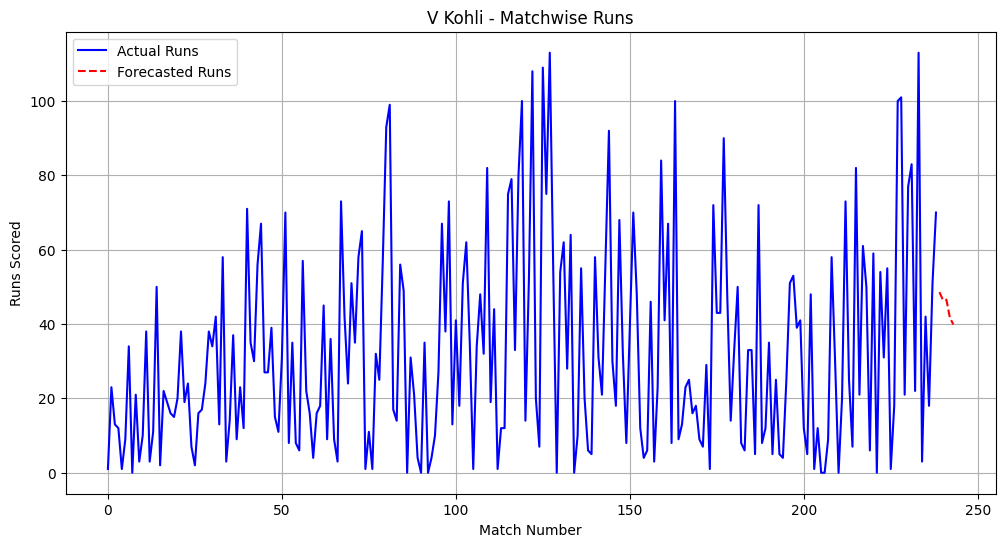

In [33]:
# Displaying the results for Kohli
plt.figure(figsize=(12, 6))
plt.plot(vkohli_score_sub["batsman_runs"], label="Actual Runs", color="blue")
plt.plot(forecast, label="Forecasted Runs", color="red", linestyle="--")
plt.title("V Kohli - Matchwise Runs")
plt.xlabel("Match Number")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# runs per batsman and match
batsman_scores=deliveries_data.groupby(['match_id','batter']).agg({'batsman_runs':'sum'}).reset_index()

# total runs per batsman
total_runs_per_batsman=batsman_scores.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs_per_batsman=total_runs_per_batsman.sort_values('batsman_runs',ascending=False)

# top 10 batsman
top_10_batsmen=total_runs_per_batsman.head(10)
top_10_batsmen

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


In [37]:
def forecast_sarima(timeseries, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    try:
        model = SARIMAX(timeseries, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5) # Forecast for the next 5 matches
        return forecast
    except Exception as e:
        print(f"Error fitting SARIMA model: {e}")
        return None

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_

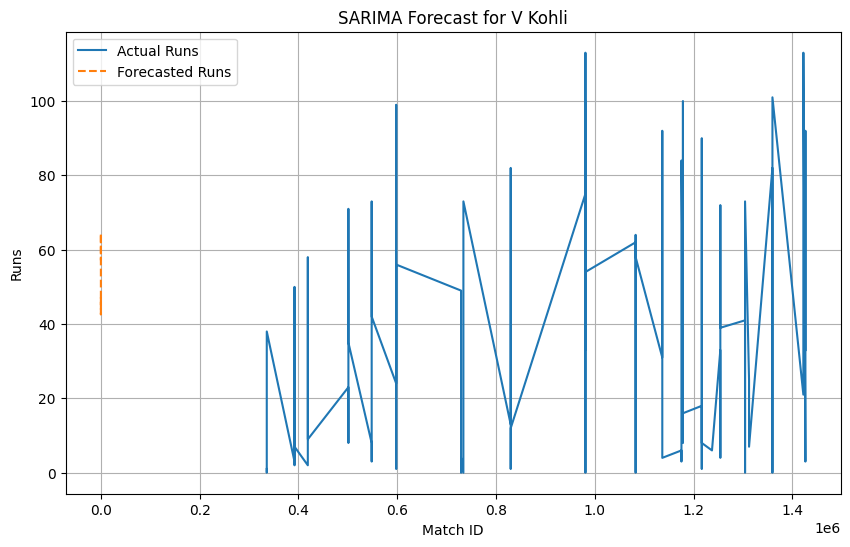

Forecasted runs for V Kohli: [47.16748587 46.35560027 42.56871891 64.38416103 57.14086707]
Mean Absolute Error (MAE): 21.581126519741648
Root Mean Squared Error (RMSE): 25.44598067457984
Mean Absolute Percentage Error (MAPE): 45.94%
R-squared (R2): 0.01


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

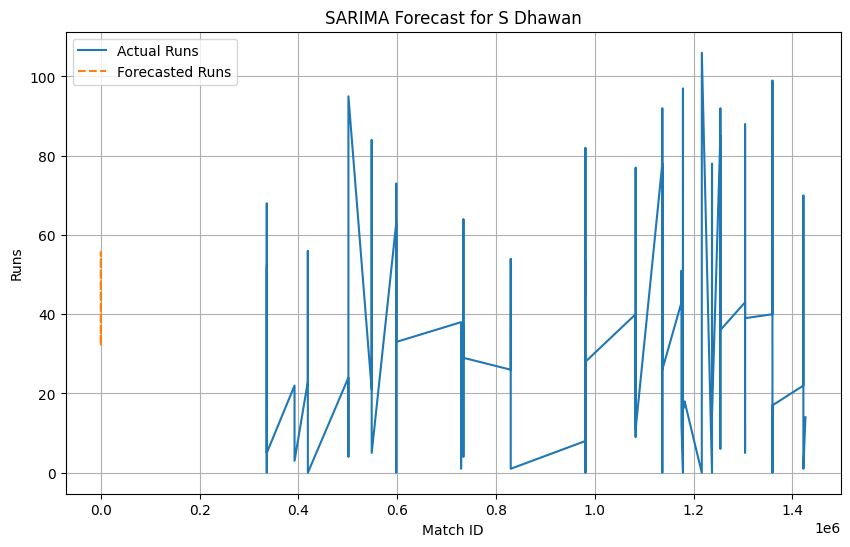

Forecasted runs for S Dhawan: [32.19068721 55.68730317 41.08047697 32.85875633 34.79368871]
Mean Absolute Error (MAE): 20.489991691532726
Root Mean Squared Error (RMSE): 22.368572652660347
Mean Absolute Percentage Error (MAPE): 689.16%
R-squared (R2): 0.35


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

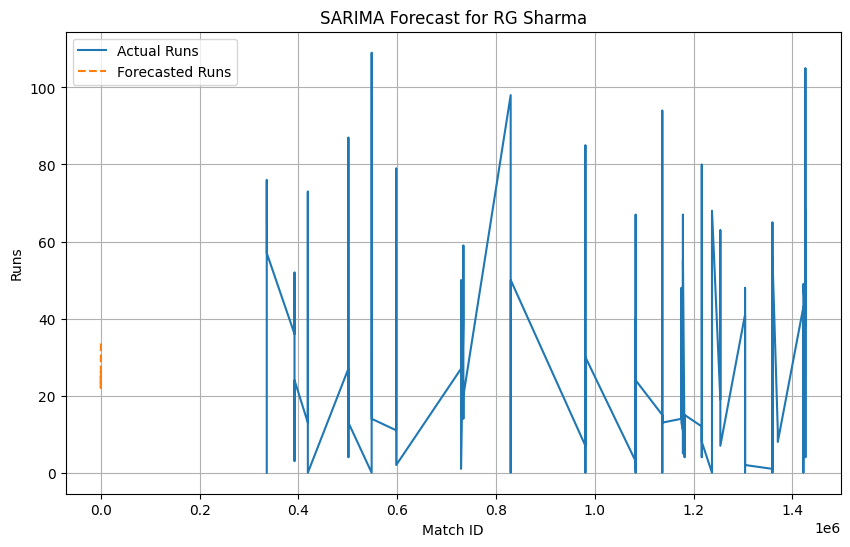

Forecasted runs for RG Sharma: [26.39983919 22.03450907 25.14286498 22.05162239 34.35832072]
Mean Absolute Error (MAE): 18.25410298193768
Root Mean Squared Error (RMSE): 21.03144745307302
Mean Absolute Percentage Error (MAPE): 250.88%
R-squared (R2): 0.68


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_

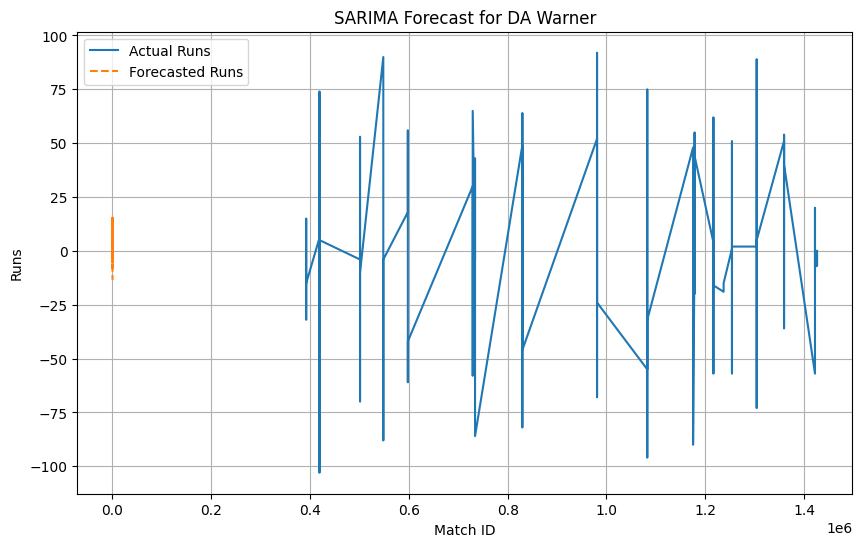

Forecasted runs for DA Warner: [ -8.33588509  15.43768659  -5.20710652  15.71106586 -13.43732286]
Mean Absolute Error (MAE): 17.69145934818618
Root Mean Squared Error (RMSE): 19.568401249885994
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.02


<ipython-input-38-5d069cf6e26c>:36: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

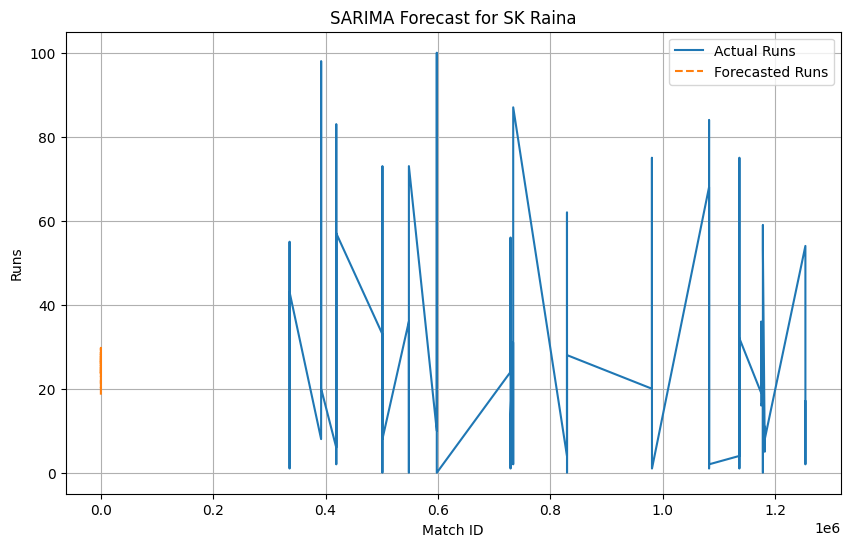

Forecasted runs for SK Raina: [18.5800284  29.73713344 23.62357626 28.6516902  19.74828974]
Mean Absolute Error (MAE): 16.66814360826418
Root Mean Squared Error (RMSE): 18.90343598516463
Mean Absolute Percentage Error (MAPE): 530.68%
R-squared (R2): 0.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

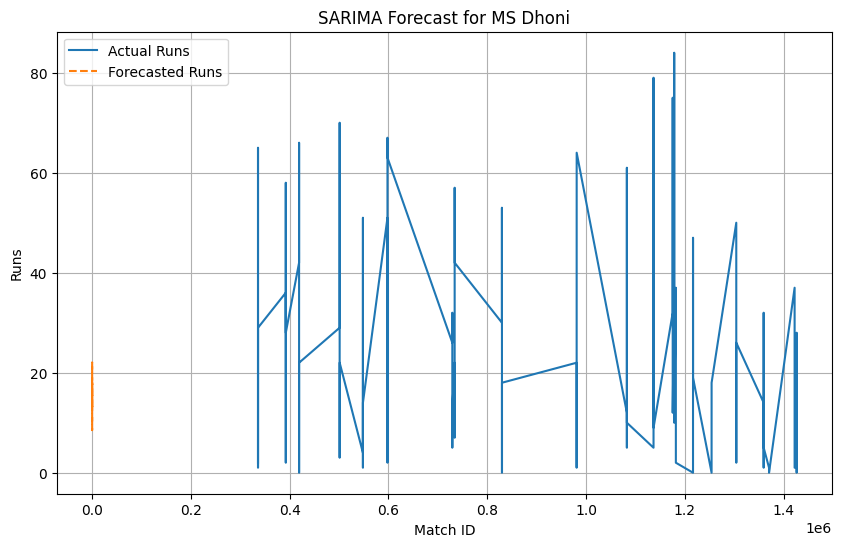

Forecasted runs for MS Dhoni: [13.12778655 22.0693018   8.49922513 18.00398901 12.38397856]
Mean Absolute Error (MAE): 9.061669180438926
Root Mean Squared Error (RMSE): 9.235925099042023
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.22


<ipython-input-38-5d069cf6e26c>:36: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

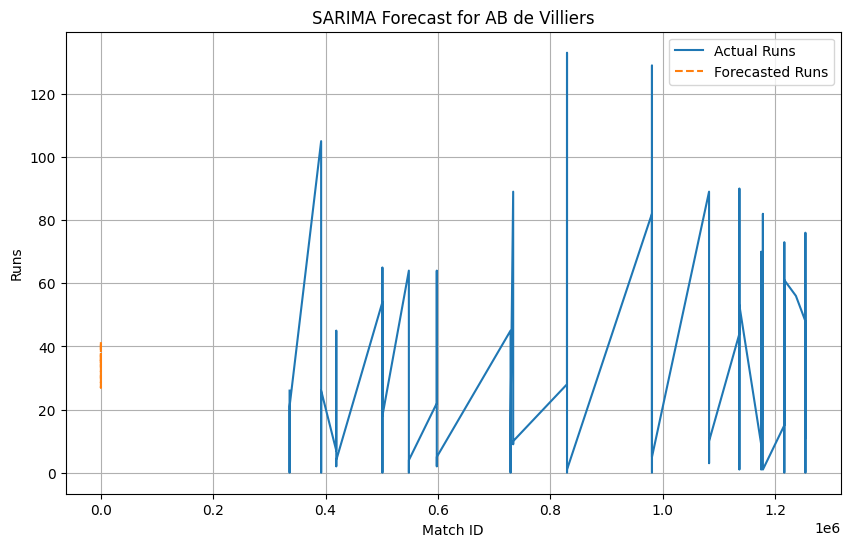

Forecasted runs for AB de Villiers: [34.68031867 41.50975579 35.70762694 26.84774915 37.71671324]
Mean Absolute Error (MAE): 22.492432758115438
Root Mean Squared Error (RMSE): 24.605019658269857
Mean Absolute Percentage Error (MAPE): 312.47%
R-squared (R2): 0.12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

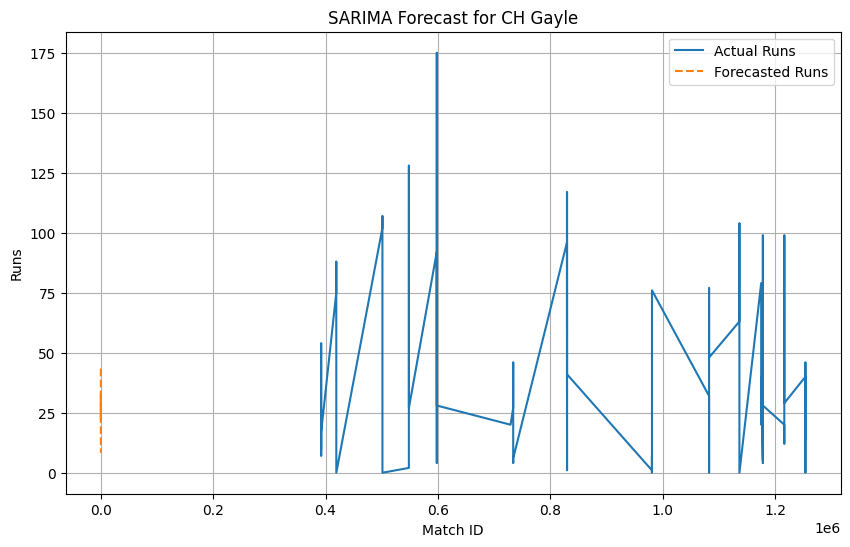

Forecasted runs for CH Gayle: [43.39776024 21.91615249 32.89240406 19.7588324   8.29791648]
Mean Absolute Error (MAE): 22.36698554541959
Root Mean Squared Error (RMSE): 25.469639154487645
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.09


<ipython-input-38-5d069cf6e26c>:36: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

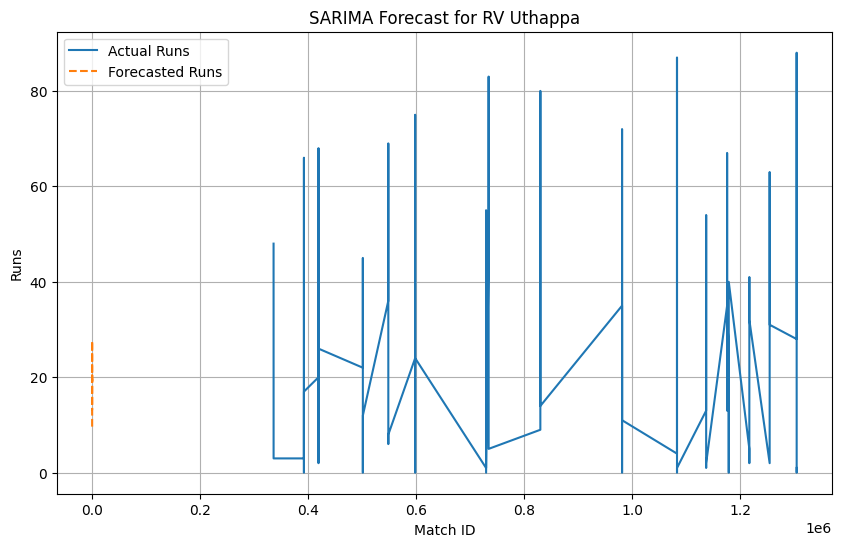

Forecasted runs for RV Uthappa: [ 9.65857158 20.45369024 19.13135311 27.60888799 13.11193577]
Mean Absolute Error (MAE): 19.52945910549597
Root Mean Squared Error (RMSE): 20.149021930146574
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.48


<ipython-input-38-5d069cf6e26c>:36: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

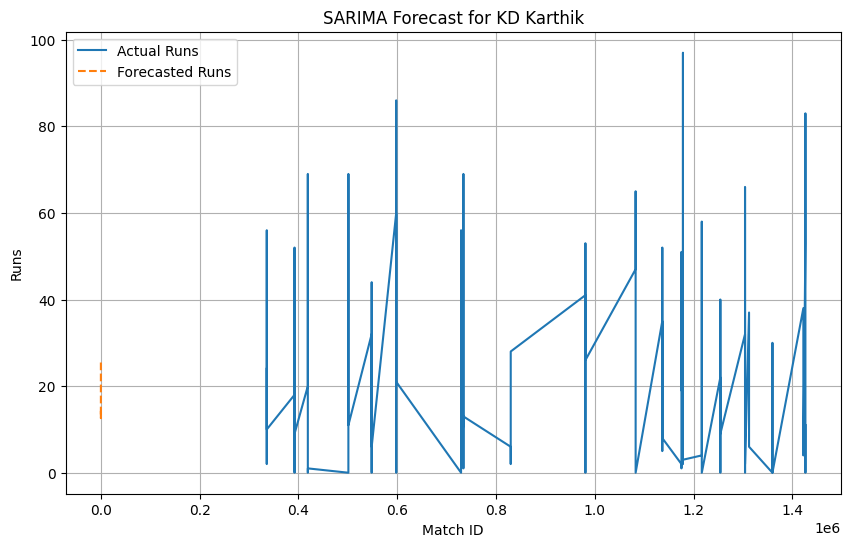

Forecasted runs for KD Karthik: [14.28059144 14.12550589 12.60047736 20.56729578 25.66205204]
Mean Absolute Error (MAE): 8.8847455666557
Root Mean Squared Error (RMSE): 9.767695012935954
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.00


<ipython-input-38-5d069cf6e26c>:36: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero


In [38]:
# Forecasting for Batsmen
for batsman_name in top_10_batsmen['batter']:
    batsman_data = batsman_scores[batsman_scores['batter'] == batsman_name].set_index('match_id')['batsman_runs']
    batsman_data = batsman_data.sort_index()

    # Stationarity Check
    adf_result = adfuller(batsman_data)
    if adf_result[1] > 0.05:
        batsman_data = batsman_data.diff().dropna()

    forecast = forecast_sarima(batsman_data)

    if forecast is not None:
        plt.figure(figsize=(10, 6))
        plt.plot(batsman_data, label='Actual Runs')
        plt.plot(forecast, label='Forecasted Runs', linestyle='--')
        plt.title(f'SARIMA Forecast for {batsman_name}')
        plt.xlabel('Match ID')
        plt.ylabel('Runs')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Forecasted runs for {batsman_name}: {forecast.values}")

        actual_runs = batsman_data.tail(len(forecast)).values
        forecast_runs = forecast.values

        mae = np.mean(np.abs(actual_runs - forecast_runs))
        print(f"Mean Absolute Error (MAE): {mae}")

        rmse = np.sqrt(np.mean((actual_runs - forecast_runs) ** 2))
        print(f"Root Mean Squared Error (RMSE): {rmse}")

        # Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

        # R-squared (R2)
        correlation_matrix = np.corrcoef(actual_runs, forecast_runs)
        correlation_xy = correlation_matrix[0, 1]
        r_squared = correlation_xy**2
        print(f"R-squared (R2): {r_squared:.2f}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

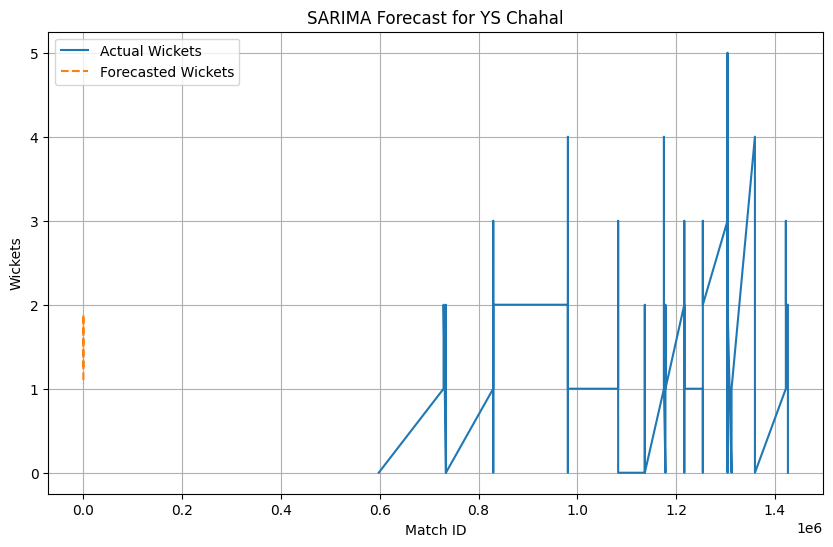

Forecasted wickets for YS Chahal: [1.25610282 1.88280108 1.35016045 1.21926384 1.06076165]
Mean Absolute Error (MAE): 0.6137537887049682
Root Mean Squared Error (RMSE): 0.6986429353641902
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.11


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

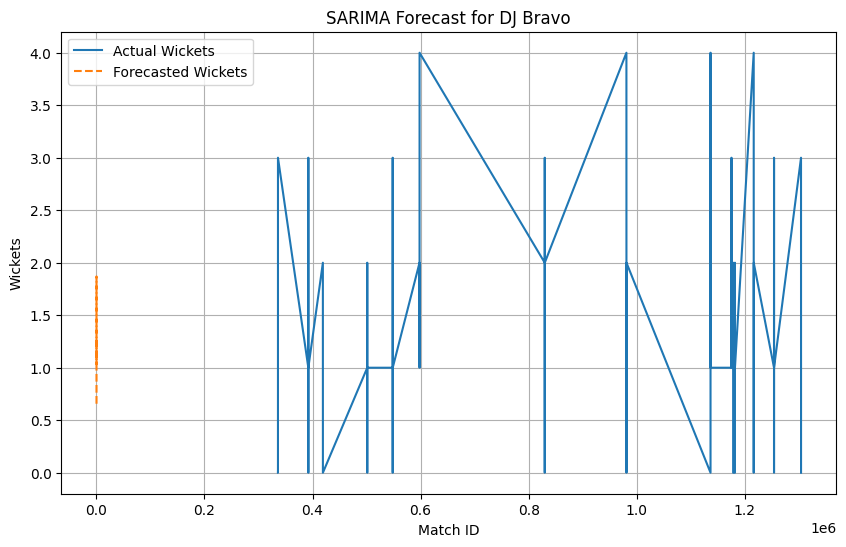

Forecasted wickets for DJ Bravo: [0.65714891 1.05040421 1.86953691 1.03429222 1.26385652]
Mean Absolute Error (MAE): 1.3304948539393882
Root Mean Squared Error (RMSE): 1.4281845133990703
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.00


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

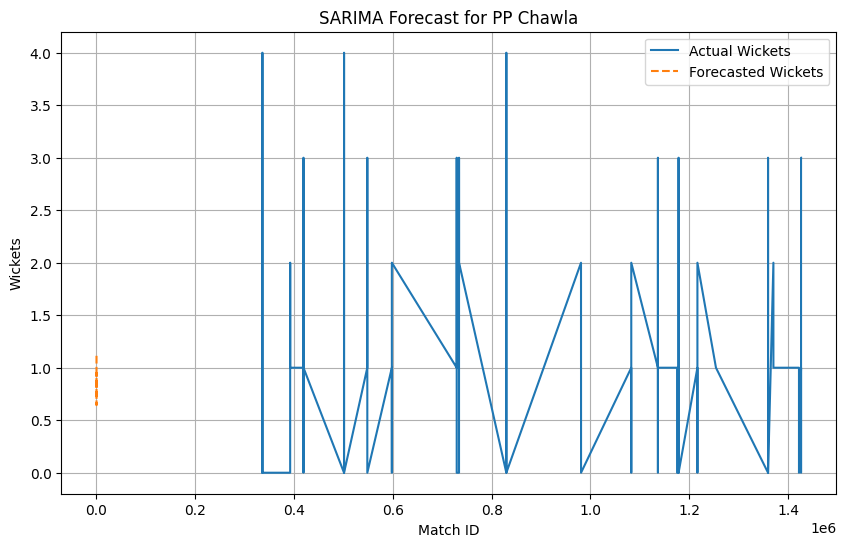

Forecasted wickets for PP Chawla: [1.11331949 0.75188164 0.95163643 0.64329816 0.77559795]
Mean Absolute Error (MAE): 1.398181060436857
Root Mean Squared Error (RMSE): 1.5675101694600104
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.17


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

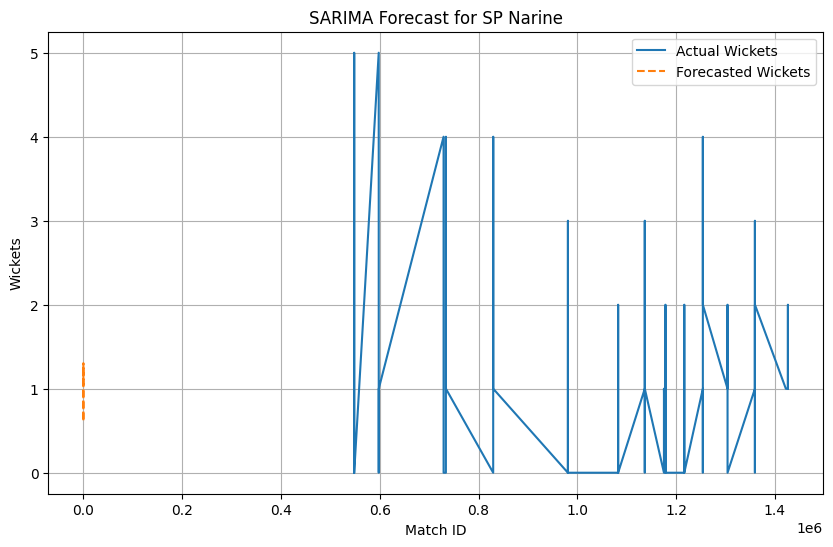

Forecasted wickets for SP Narine: [1.25473608 0.61094699 0.71010864 1.30470594 1.04790373]
Mean Absolute Error (MAE): 0.4334812166509135
Root Mean Squared Error (RMSE): 0.5052813390404336
Mean Absolute Percentage Error (MAPE): 28.94%
R-squared (R2): 0.73


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

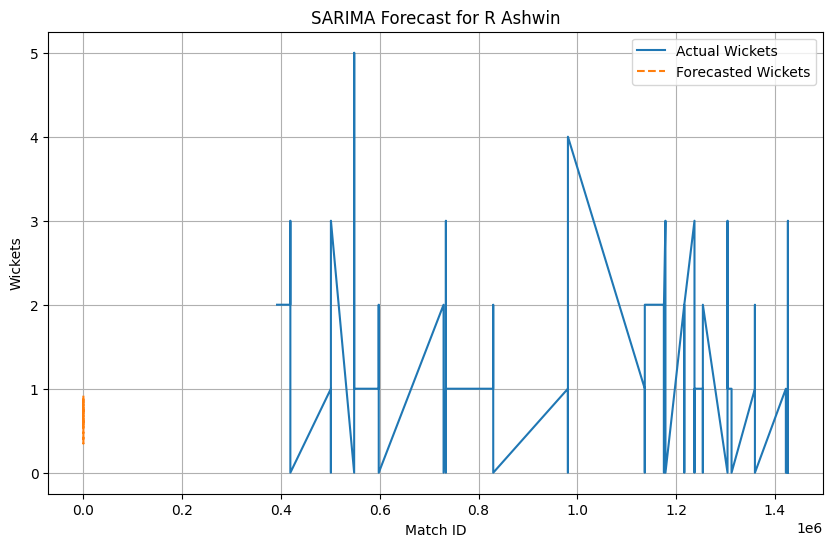

Forecasted wickets for R Ashwin: [0.82124914 0.34556298 0.91922572 0.64099397 0.5320188 ]
Mean Absolute Error (MAE): 1.3286876843157487
Root Mean Squared Error (RMSE): 1.4463080209649275
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.01


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

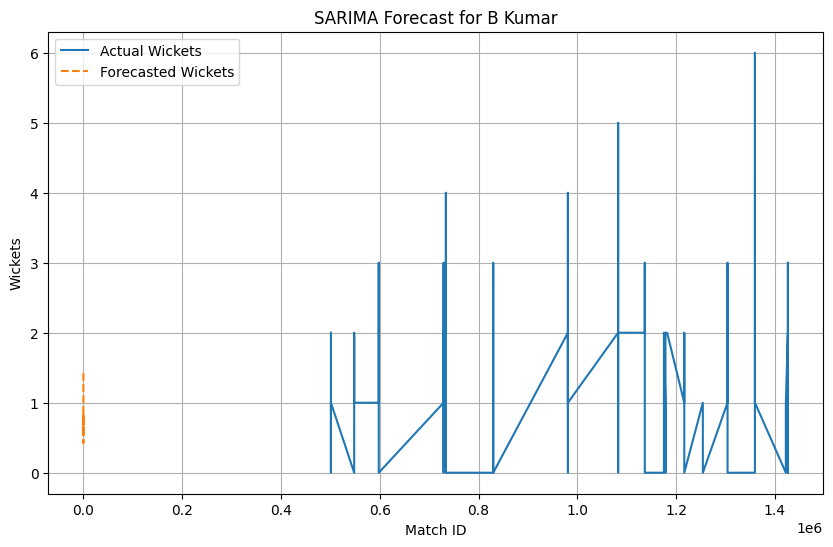

Forecasted wickets for B Kumar: [1.42268622 0.42242139 0.82984692 0.56014528 0.84016353]
Mean Absolute Error (MAE): 0.645978179050387
Root Mean Squared Error (RMSE): 0.6663354144852854
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.78


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

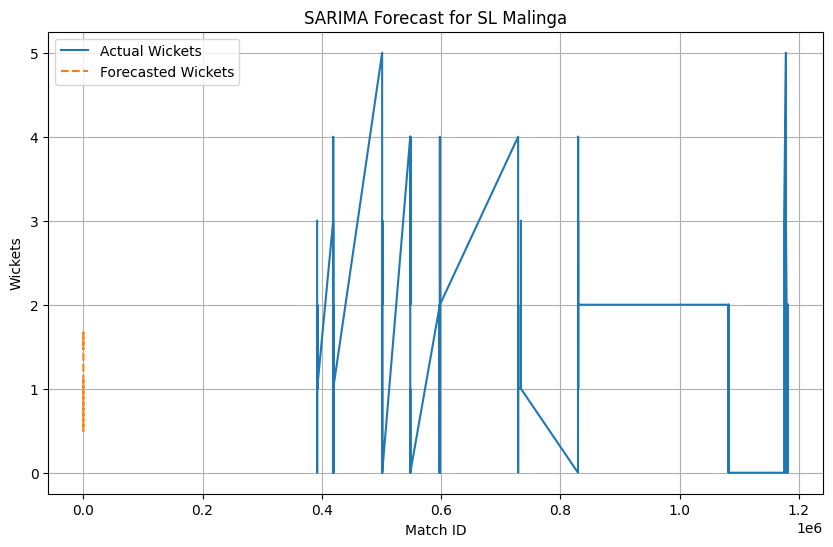

Forecasted wickets for SL Malinga: [1.10113449 0.49518242 1.27015692 1.6734459  1.45985322]
Mean Absolute Error (MAE): 1.1079505358574147
Root Mean Squared Error (RMSE): 1.2281888798513083
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.08


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

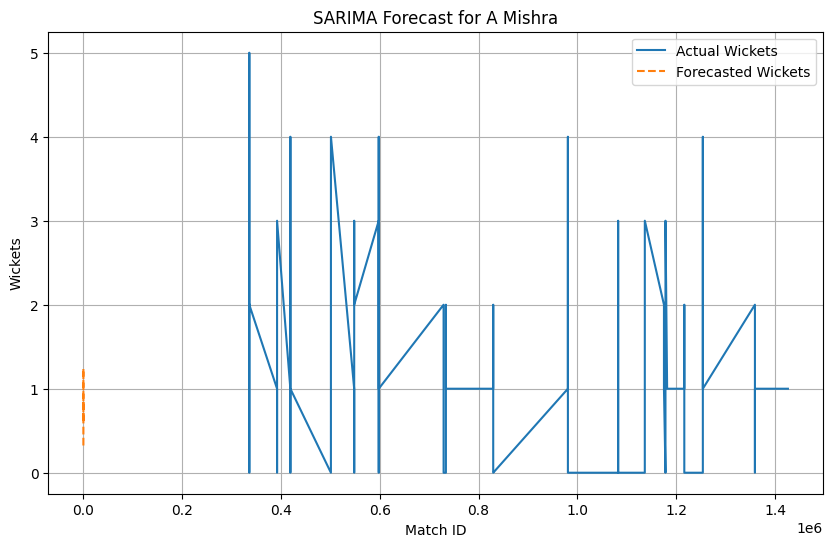

Forecasted wickets for A Mishra: [0.32421703 1.23953102 0.88813571 0.59763983 0.87853168]
Mean Absolute Error (MAE): 0.7102013534903409
Root Mean Squared Error (RMSE): 0.8253496503478969
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.13


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

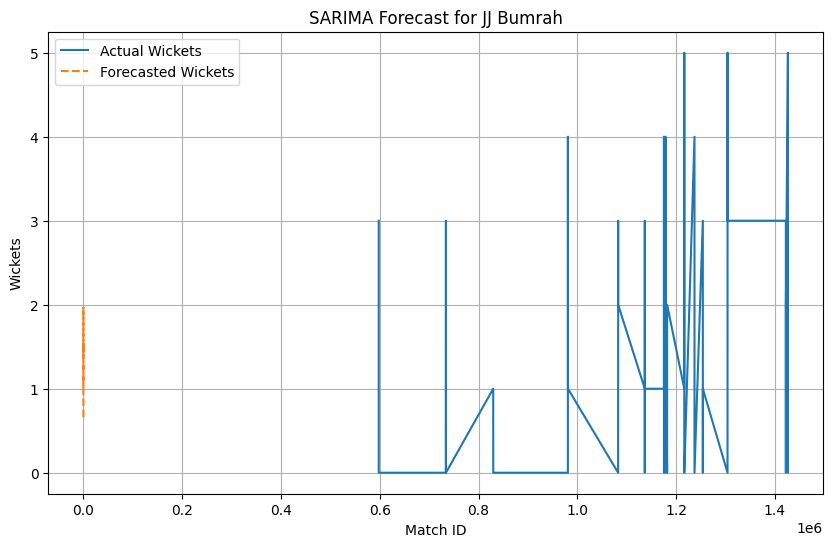

Forecasted wickets for JJ Bumrah: [0.66134977 1.55665029 1.41645545 1.96801284 1.01545761]
Mean Absolute Error (MAE): 1.2862800599561095
Root Mean Squared Error (RMSE): 1.4086102943248546
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.06


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

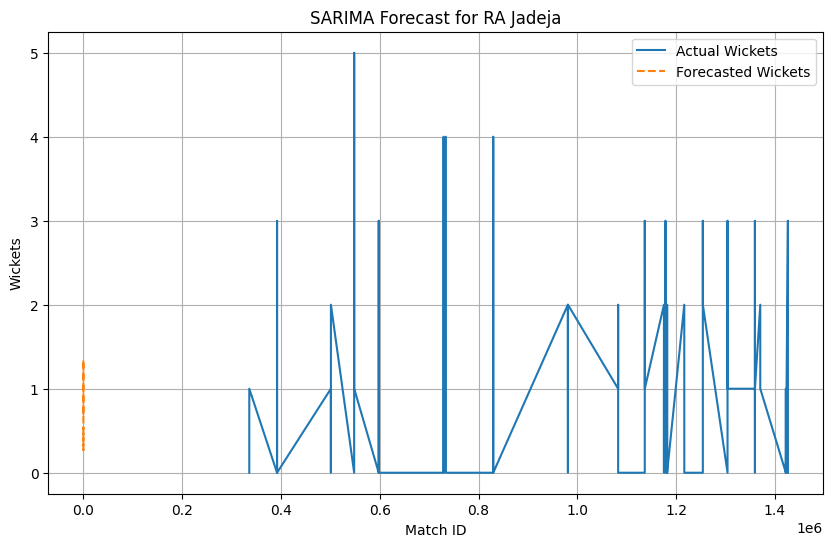

Forecasted wickets for RA Jadeja: [0.69066118 1.03116007 1.34170528 0.26736056 0.54827631]
Mean Absolute Error (MAE): 0.9633686543963403
Root Mean Squared Error (RMSE): 1.1424189422319464
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): 0.12


<ipython-input-39-d09024587a9a>:30: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero


In [39]:
# Forecasting for Bowlers
for bowler_name in top_bowlers['bowler']:
    bowler_timeseries = performance[performance['bowler'] == bowler_name].set_index('match_id')['wickets']
    bowler_timeseries = bowler_timeseries.sort_index()

    forecast = forecast_sarima(bowler_timeseries)
    if forecast is not None:
        plt.figure(figsize=(10, 6))
        plt.plot(bowler_timeseries, label='Actual Wickets')
        plt.plot(forecast, label='Forecasted Wickets', linestyle='--')
        plt.title(f'SARIMA Forecast for {bowler_name}')
        plt.xlabel('Match ID')
        plt.ylabel('Wickets')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Forecasted wickets for {bowler_name}: {forecast.values}")

        actual_runs = bowler_timeseries.tail(len(forecast)).values
        forecast_runs = forecast.values

        mae = np.mean(np.abs(actual_runs - forecast_runs))
        print(f"Mean Absolute Error (MAE): {mae}")

        rmse = np.sqrt(np.mean((actual_runs - forecast_runs) ** 2))
        print(f"Root Mean Squared Error (RMSE): {rmse}")

        # Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((actual_runs - forecast_runs) / actual_runs)) * 100  # avoid division by zero
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

        # R-squared (R2)
        correlation_matrix = np.corrcoef(actual_runs, forecast_runs)
        correlation_xy = correlation_matrix[0, 1]
        r_squared = correlation_xy**2
        print(f"R-squared (R2): {r_squared:.2f}")